## 1번

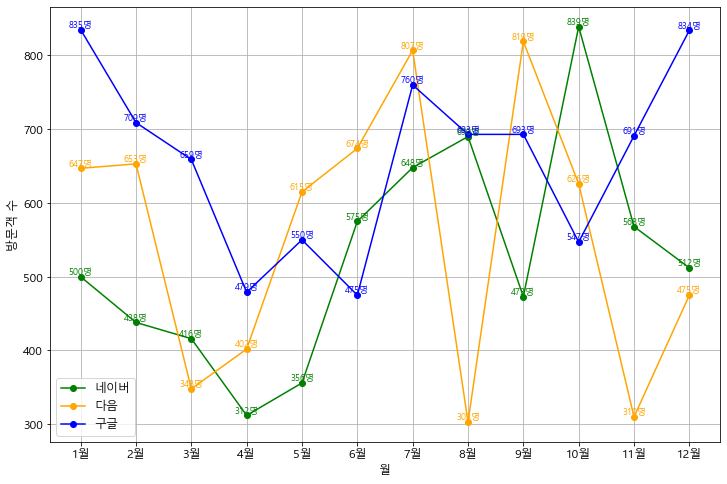

In [1]:
from matplotlib import pyplot as plt 
import numpy as np

# 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12,8)

file_list = []

label = []
dic = {}

def graph_text(x, value, color, horizon, vertical): # x텍스트 표시 함수
    for i ,v in enumerate(x):
        str_val = '%d명' %value[i]
        plt.text(x[i], value[i], str_val, fontsize = 9, color = color,
        horizontalalignment = horizon, verticalalignment = vertical)

# 파일 가져오기
with open('website_visit.csv', 'r', encoding='euc-kr') as f:
    
    lines = f.readlines()
    
    for i, line in enumerate(lines):
        
        tmp = line.strip().split(',')

        if i == 0:
            label = tmp[1:] # 첫번째 행을 그래프의 라벨로 사용
        else:
            tmp_list = []
            for j, v in enumerate(tmp):
                if j == 0:
                    continue
                tmp_list.append(int(v)) # int 형식으로 바꿔서 임시 리스트에 저장
            dic[tmp[0]] = np.array(tmp_list) # 각 딕셔너리 키에 값 추가
                
    
# 그래프 설정
xpos = np.arange(len(label))

plt.figure()

color_set = ['green','orange','blue']

for i, v in enumerate(dic):
    plt.plot(dic[v], label = v, marker = 'o', linestyle = '-', color = color_set[i])

plt.legend()
plt.grid()
plt.xlabel('월')
plt.ylabel('방문객 수')
plt.xticks(xpos, label)


for i,v in enumerate(dic):
    graph_text(xpos, dic[v], color_set[i] , 'center', 'bottom')

file_list.append('visit_diff_year.png')
plt.savefig('visit_diff_year.png')
plt.show()
plt.close()


## 2번

[527.25, 556.5833333333334, 660.4166666666666]


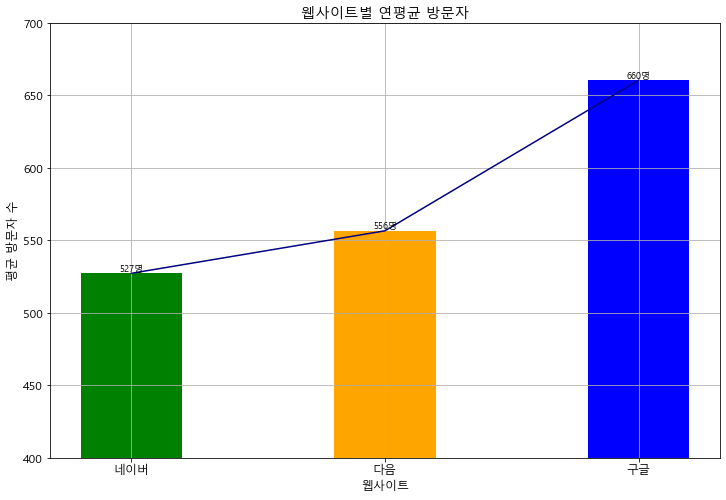

In [2]:
average_list = []

key_list = list(dic.keys()) # label로 쓰기위한 키리스트
xpos = np.arange(len(key_list)) # 새로운 x 좌표 생성

for i in dic:
    average_list.append(np.average(dic[i]))
print(average_list)

plt.figure()

plt.bar(xpos, average_list, label = '웹사이트별 연평균 방문자', width=0.4, color=color_set)
plt.plot(average_list, color = 'navy')
plt.grid()

plt.xlabel('웹사이트')
plt.ylabel('평균 방문자 수')
plt.ylim(400,700)
plt.title('웹사이트별 연평균 방문자')
plt.xticks(xpos, key_list)

graph_text(xpos, average_list, 'black' , 'center', 'bottom') # 텍스트 표시

file_list.append('visit_average_year.png')
plt.savefig('visit_average_year.png')
plt.show()
plt.close()

## 3번

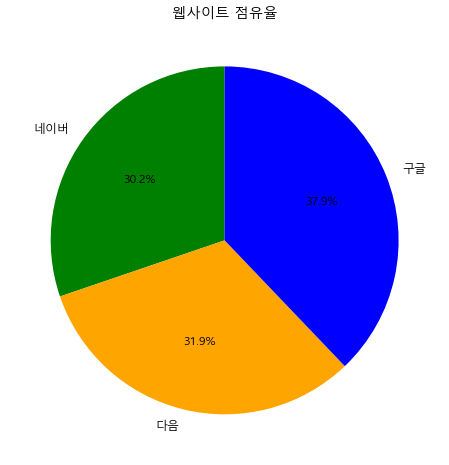

In [3]:
sum_list = []

for i in dic:
    sum_list.append(np.sum(dic[i])) # 각 1년간 총이용자 리스트 생성

ratio = sum_list
labels = key_list

explode = [0.0, 0.0, 0.0]

plt.figure()
plt.title('웹사이트 점유율')
plt.pie(ratio, labels = labels, colors = color_set, explode = explode,
    autopct = '%0.1f%%', shadow=False, startangle=90)

file_list.append('website_ratio.png')
plt.savefig('website_ratio.png')
plt.show()
plt.close()

## 4번

In [4]:
print(file_list)

['visit_diff_year.png', 'visit_average_year.png', 'website_ratio.png']


In [5]:
from sendmail import sendmail

sendmail('cj562270@gmail.com', 'leekh4232@gmail.com',
'[천준홍] 유입 경로 분석 결과', '안녕하세요. 유입 경로 분석 결과입니다.', file_list)